<a href="https://colab.research.google.com/github/Sujal-vajire/Machine-learning-models/blob/main/Multivariate_Linear_Regression_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multivariate Linear Regression
## Predicting Load from displacement and capacitance


### Import Libraries

In [ ]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
import pandas as pd


### Read Data

In [ ]:
data = pd.read_csv('new.csv',)

In [ ]:
data.shape

(101, 3)

### Normalize Data

In [ ]:
data = normalize(data, axis=0)

### Seperate Data into X and Y

In [ ]:
X = data[:, 0:2]
Y = data[:, 2:]

### Visualize the Data

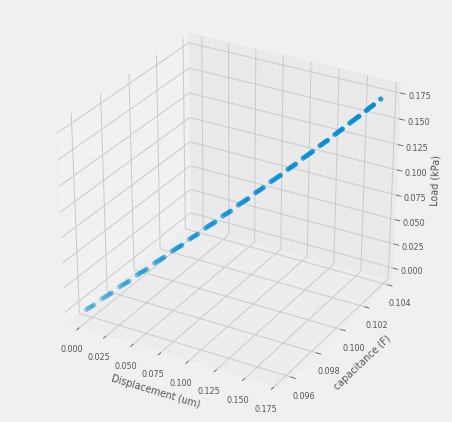

In [ ]:
# Fixing random state for reproducibility
np.random.seed(19680801)
plt.rcParams.update({'font.size': 8})
resolution_value = 600
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

xs = X[:, 0]
ys = X[:, 1]
zs = Y
ax.scatter(xs, ys, zs)

ax.set_xlabel('Displacement (um)')
ax.set_ylabel('capacitance (F)')
ax.set_zlabel('Load (kPa)')
#plt.savefig("myImage.png", format="png", dpi=resolution_value)

plt.show()

### Hyperparameters

In [ ]:
learning_rate = 0.09
max_iteration = 500

In [ ]:
s_learning_rate = 0.06
s_max_iteration = 500

In [ ]:

mb_learning_rate = 0.09
mb_max_iteration = 500
batch_size = 16

### Parameters

In [ ]:
theta = np.zeros((data.shape[1], 1))
s_theta = np.zeros((data.shape[1], 1))
mb_theta = np.zeros((data.shape[1], 1))

### Hypothesis

In [ ]:
def h (theta, X) :
  tempX = np.ones((X.shape[0], X.shape[1] + 1))
  tempX[:,1:] = X
  return np.matmul(tempX, theta)

### Loss Function

In [ ]:
def loss (theta, X, Y) :
  return np.average(np.square(Y - h(theta, X))) / 2

### Calculate Gradients

In [ ]:
def gradient (theta, X, Y) :
  tempX = np.ones((X.shape[0], X.shape[1] + 1))
  tempX[:,1:] = X
  d_theta = - np.average((Y - h(theta, X)) * tempX, axis= 0)
  d_theta = d_theta.reshape((d_theta.shape[0], 1))
  return d_theta

### Batch Gradient Descent

In [ ]:
def gradient_descent (theta, X, Y, learning_rate, max_iteration, gap) :
  cost = np.zeros(max_iteration)
  for i in range(max_iteration) :
    d_theta = gradient (theta, X, Y)
    theta = theta - learning_rate * d_theta
    cost[i] = loss(theta, X, Y)
    if i % gap == 0 :
      print ('iteration : ', i, ' loss : ', loss(theta, X, Y)) 
  return theta, cost

### Mini-Batch Gradient Descent

In [ ]:
def minibatch_gradient_descent (theta, X, Y, learning_rate, max_iteration, batch_size, gap) :
  cost = np.zeros(max_iteration)
  for i in range(max_iteration) :
    for j in range(0, X.shape[0], batch_size):
      d_theta = gradient (theta, X[j:j+batch_size,:], Y[j:j+batch_size,:])
      theta = theta - learning_rate * d_theta
    
    cost[i] = loss(theta, X, Y)
    if i % gap == 0 :
      print ('iteration : ', i, ' loss : ', loss(theta, X, Y)) 
  return theta, cost

### Stochastic Gradient Descent

In [ ]:
def stochastic_gradient_descent (theta, X, Y, learning_rate, max_iteration, gap) :
  cost = np.zeros(max_iteration)
  for i in range(max_iteration) :
    for j in range(X.shape[0]):
      d_theta = gradient (theta, X[j,:].reshape(1, X.shape[1]), Y[j,:].reshape(1, 1))
      theta = theta - learning_rate * d_theta
    
    cost[i] = loss(theta, X, Y)
    if i % gap == 0 :
      print ('iteration : ', i, ' loss : ', loss(theta, X, Y)) 
  return theta, cost

### Train Model

In [ ]:
theta, cost = gradient_descent (theta, X, Y, learning_rate, max_iteration, 100)

iteration :  0  loss :  0.004301050783533097
iteration :  100  loss :  0.0011839405899811265
iteration :  200  loss :  0.001133599367695085
iteration :  300  loss :  0.0010853998694046044
iteration :  400  loss :  0.0010392509644992077


In [ ]:
s_theta, s_cost = stochastic_gradient_descent (s_theta, X, Y, s_learning_rate, s_max_iteration, 100)

iteration :  0  loss :  0.0029617228760869686
iteration :  100  loss :  0.0004112400384711262
iteration :  200  loss :  5.546231076005809e-05
iteration :  300  loss :  7.420636819614517e-06
iteration :  400  loss :  1.429312738224668e-06


In [ ]:
mb_theta, mb_cost = minibatch_gradient_descent (mb_theta, X, Y, mb_learning_rate, mb_max_iteration, batch_size, 100)

iteration :  0  loss :  0.001849190017113217
iteration :  100  loss :  0.0009757782471913665
iteration :  200  loss :  0.0006815204434783645
iteration :  300  loss :  0.0004757985230559798
iteration :  400  loss :  0.0003320178846580072


### Optimal values of Parameters using Trained Model

In [ ]:
theta

array([[0.07530798],
       [0.11104792],
       [0.01255528]])

In [ ]:
s_theta

array([[-0.00672928],
       [ 1.02302912],
       [ 0.04776524]])

In [ ]:
mb_theta

array([[0.037853  ],
       [0.60666537],
       [0.03320681]])

### Cost vs Iteration Plots

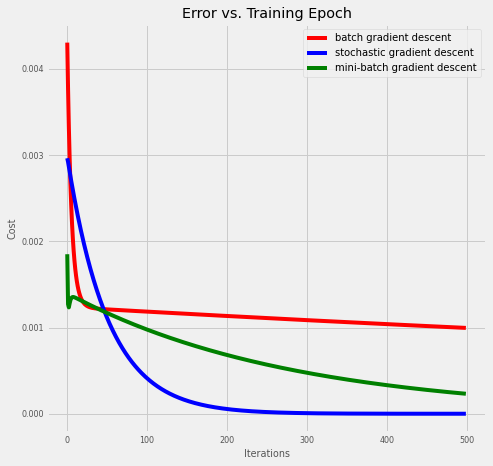

In [ ]:
#plot the cost
fig, ax = plt.subplots()  
plt.rcParams.update({'font.size': 10})
resolution_value = 600
ax.plot(np.arange(max_iteration), cost, 'r')  
ax.plot(np.arange(max_iteration), s_cost, 'b')  
ax.plot(np.arange(max_iteration), mb_cost, 'g')  
ax.legend(loc='upper right', labels=['batch gradient descent', 'stochastic gradient descent', 'mini-batch gradient descent'])
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Error vs. Training Epoch')  
plt.savefig("myImage2.png", format="png", dpi=resolution_value)
plt.show()

### Visualize the Data

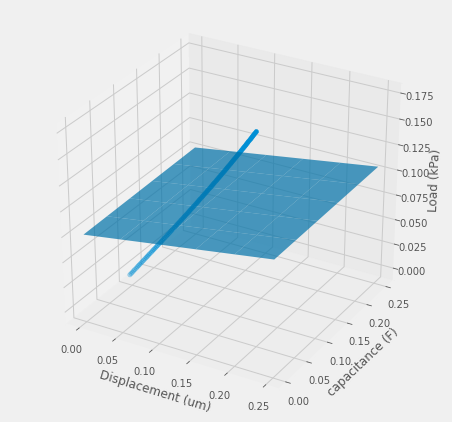

In [ ]:
# Fixing random state for reproducibility
# np.random.seed(19680801)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plt.rcParams.update({'font.size': 8})
resolution_value = 600
xs = X[:, 0]
ys = X[:, 1]
zs = Y
ax.scatter(xs, ys, zs)

ax.set_xlabel('Displacement (um)')
ax.set_ylabel('capacitance (F)')
ax.set_zlabel('Load (kPa)')

x = y = np.arange(0, 0.3, 0.05)
xp, yp = np.meshgrid(x, y)
z = np.array([h(theta, np.array([[x,y]]))[0, 0] for x,y in zip(np.ravel(xp), np.ravel(yp))])
zp = z.reshape(xp.shape)

ax.plot_surface(xp, yp, zp, alpha=0.7)
plt.savefig("Batch Gradient Descent.png", format="png", dpi=resolution_value)    
plt.show()




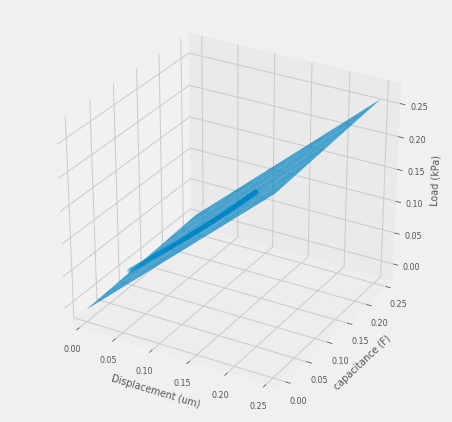

In [ ]:
# Fixing random state for reproducibility
# np.random.seed(19680801)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plt.rcParams.update({'font.size': 8})
resolution_value = 600

xs = X[:, 0]
ys = X[:, 1]
zs = Y
ax.scatter(xs, ys, zs)

ax.set_xlabel('Displacement (um)')
ax.set_ylabel('capacitance (F)')
ax.set_zlabel('Load (kPa)')


x = y = np.arange(0, 0.3, 0.05)
xp, yp = np.meshgrid(x, y)
z = np.array([h(s_theta, np.array([[x,y]]))[0, 0] for x,y in zip(np.ravel(xp), np.ravel(yp))])
zp = z.reshape(xp.shape)

ax.plot_surface(xp, yp, zp, alpha=0.7)
plt.savefig("Mini-Batch Gradient Descent.png", format="png", dpi=resolution_value)     
plt.show()

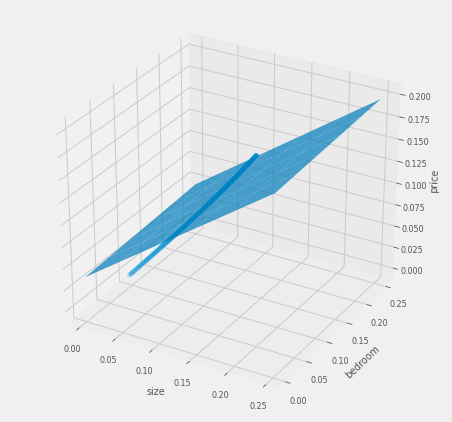

In [ ]:
# Fixing random state for reproducibility
# np.random.seed(19680801)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plt.rcParams.update({'font.size': 8})
resolution_value = 600

x = y = np.arange(0, 0.3, 0.05)
xp, yp = np.meshgrid(x, y)
z = np.array([h(mb_theta, np.array([[x,y]]))[0, 0] for x,y in zip(np.ravel(xp), np.ravel(yp))])
zp = z.reshape(xp.shape)
ax.plot_surface(xp, yp, zp, alpha=0.7)

xs = X[:, 0]
ys = X[:, 1]
zs = Y
ax.scatter(xs, ys, zs)


ax.set_xlabel('size')
ax.set_ylabel('bedroom')
ax.set_zlabel('price')
plt.savefig("Stochastic Gradient Descent.png", format="png", dpi=resolution_value)     
plt.show()

In [ ]:
# Import libraries
## Basic libs
import pandas as pd
import numpy as np
import warnings
## Building Model
from sklearn import linear_model
from scipy import stats
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
## Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (7, 7)
plt.style.use('ggplot')

# Load dataset
df_pie = pd.read_csv('new.csv',)

print(df_pie.shape)
df_pie

(101, 3)


,Displacement-um,Cap from elect energy (F),p0 (kPa)
0,4.199200e-07,2.090000e-14,0.0
1,1.434900e-02,2.090000e-14,0.5
2,2.871300e-02,2.090000e-14,1.0
3,4.307600e-02,2.090000e-14,1.5
4,5.745000e-02,2.090000e-14,2.0
...,...,...,...
96,1.314000e+00,2.260000e-14,48.0
97,1.326300e+00,2.260000e-14,48.5
98,1.338600e+00,2.260000e-14,49.0
99,1.350900e+00,2.260000e-14,49.5


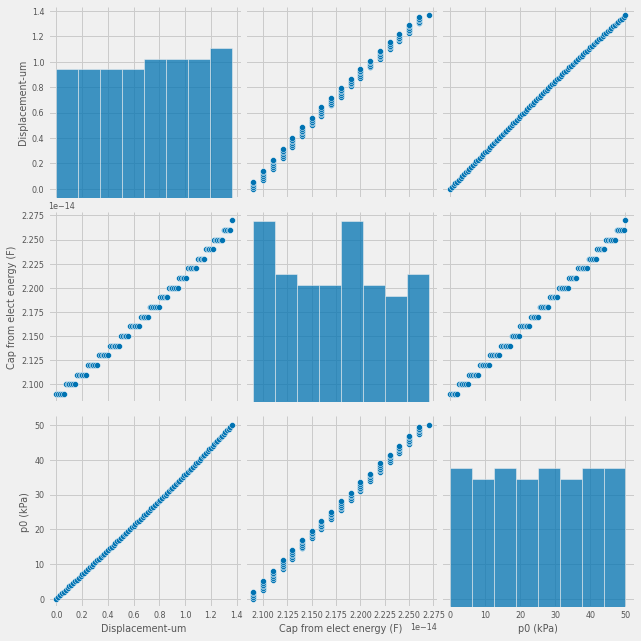

In [ ]:
# Visualize the data using scatter plot and histogram
sns.set_palette('colorblind')
resolution_value = 600
sns.pairplot(data=df_pie, height=3)
plt.savefig("data Vz.png", format="png", dpi=resolution_value)  